# Gaussian Quadrature Project
## What is Gaussian Quadrature?
In order to understand Gaussian Quadrature let us first understand what quadrature rule is. **Quadrature rule** is an approximation of the definite integral of a function given by: 

$\begin{equation} \int_{b}^a F(s)ds = \sum_{j = 1}^{n + 1}w_jF(s_j) + E(F) \end{equation},$

where $w_j$ are coeffecients, $s_j$ are quadrature points (also known as nodes), and E(F) is an error term that equals 0 if F(x) is a polynomial of degree $\leq n$, where n is the number of points being evaluated. Now **Gaussian Quadrature** is a quadrature rule used to obtained the exact result for polynomials of a degree 2n - 1 or less. Gaussian quadrature uses the function values evaluated at a number of interior points and corresponding weights to approximate the integral by a weighted sum. Hence, Gaussian quadrature is summed up in the following equation:

$\begin{equation} \int_{-1}^{1}f(x)dx = \sum_{j = 0}^{n - 1}w_jf(x_j) \end{equation}$.

This equation is known as the Gauss-Legendre rule. The importance of Gaussian quadrature as compared to other techniques such as the Simpson's rule is the difference in level of accuracy. The Simpson's rule, given 3 points, will evaluate the integral to an order of accuracy of 3, while given less points, Gaussian quadrature will evaluate the same integral with a higher order of accuracy. 

A key factor of Gaussian qaudrature is that it deals with integratation over a symmetrical range of x from -1 to 1, as shown in the equation above. There is a linear transformation that can be performed to adjust the limit of the integration given any limit of x = a and x = b: 

$\begin{equation} I = \int_a^b f(x)dx = \frac{b - a}{2}\int_{-1}^{1} f(\frac{b - a}{2}\epsilon + \frac{a + b}{2})d\epsilon \end{equation}$.

This allows all points being evaluated for the integration of a function to be within the interval [-1,1]. 





## Mathematical Analysis of Gaussian Quadrature
Given the Gauss-Legendre rule:

$\begin{equation} \int_{a}^{b}f(x)dx = \sum_{j = 0}^{n - 1}w_jf(x_j) \end{equation}$,

where,

$\begin{equation} s_j = \frac{a + b + (b - a)\epsilon_j}{2} \end{equation}$, $w_j = \frac{b - a}{(1 - \epsilon_j)^2[P_n'()\epsilon_j]}$,

$\epsilon_j$ are the Gauss points for an interval [-1,1] which are the zeros for the legendre polynomial denoted as $P_n(x)$ in the same interval. This rule can be transformed into the interval [-1,1] as follows: 

$\begin{equation} \int_{-1}^{1}F(s)ds = \sum_{j = 1}^{n}w_jf(s_j) \end{equation}$,

with $w_j$ as the weights and $x_j$ as the zeros of $P_n(x)$ such that

$\begin{equation} w_j = \frac{1}{P'_n(x_j}\int_{-1}^{1}\frac{P_n(x)}{x - x_j}dx \end{equation}$.

$P_n$ is defined as the **Legendre Polynomial** and its equation is 

$\begin{equation} P_n(x) = \frac{1}{2^nn!}\frac{d^n}{dx_n}[(x^2 - 1)^n] \end{equation}$,

alternatively, $P_n$ may be determined by the following:

$\begin{equation} P_n(x) = 2^n \sum_{i=0}^n {n \choose i}{(n + i - 1)/2 \choose n}x^j \end{equation}$,

where ${n \choose i}$ is equal to $^nC_i$ = $\frac{n!}{(n - 1)!j!}$.

As a result of the Legendre polynomial, Gaussian quadrature is also referred to as Gauss-Legendre Quadrature. There are other forms of Gaussian quadrature, such as Chebyshev-Gauss, Gauss-Laguerre, and Gauss-Hermite which are all designed to solve a particular type of integrals; however, this project will be focusing on the Gauss-Legendre method of solving integrals.




## Gaussian Quadrature: How to Setup Code

Knowing what we now know about the Gauss-Legendre quadrature rule, the equations and general recipe of the rule are present to begin coding; however, there are innate issues and complications that arise from doing it this way. Generally, for any given n, the respective Legendre Polynomials and weights are not as simply coded from their direct equations (at least for someone of my skill level). This gives way to a brute force method of coding the Gauss-Legendre quadrature rule and this is by implementing the known values of the Legendre polynommials, the weights, and the abscissae (or x values). There are tables able to be found online and for the following example, the weights and abscissae were found on pomax.github.io:

### n=2                       
$w_1 = 1, x_1 = -0.5773502691896257$

$w_2 = 2, x_2 = 0.5773502691896257$

### n=3
$w_1 = 0.8888888888888888, x_1 = 0$

$w_2 = 0.5555555555555556, x_2 = -0.7745966692414834$

$w_3 = 0.5555555555555556, x_3 = 0.7745966692414834$

### n=4
$w_1 = 0.6521451548625461, x_1 = -0.3399810435848563$

$w_2 = 0.6521451548625461, x_2 = 0.3399810435848563$

$w_3 = 0.3478548451374538, x_3 = -0.8611363115940526$

$w_4 = 0.3478548451374538, x_4 = 0.8611363115940526 $

the higher the order, the more accurate the approximation is using the Gauss-Legendre rule. This list expands to infinity but for the purposes of this project, these values will be used to show the accuracy of the Gauss-Legendre rule up to the 4th polynomial order.

In addition, the Legendre polynomials are used to find the weights at each order. To serve as an example, I will show the first 6 Legendre polynomials (Wolfram Alpha):

$P_0 = 1$

$P_1 = x$

$P_2 = \frac{1}{2}(3x^2 - 1)$

$P_3 = \frac{1}{2}(5x^3) - 3x$

$P_4 = \frac{1}{8}(35x^4 - 30x^2 + 3)$

$P_5 = \frac{1}{8}(63x^5 - 70x^3 + 15x)$

$P_6 = \frac{1}{16}(231x^6 - 315x^4 + 105x^2 - 5)$

## Brute Force Coding Method for Gauss-Legendre Method

In [231]:
from numpy import *

def Gauss(f, a, b, n): #This is a method defined solely on the known values of the weight (w_i) and abscissae (x_i)
    if n == 2:
        wi = np.array([1, 1])
        xi = np.array([-0.5773502691896257, 0.5773502691896257])
    elif n == 3:
        wi = np.array([0.5555555555555556, 0.8888888888888888, 0.5555555555555556])
        xi = np.array([-0.7745966692414834, 0, 0.7745966692414834])
    elif n == 4:
        wi = np.array([0.3478548451374538, 0.6521451548625461, 0.6521451548625461, 0.3478548451374538])
        xi = np.array([-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526])
    return ((b - a)/2)*sum(wi*f((b - a)/2*xi + (a + b)/2)) #application of the Gaussian Quadrature rule 

      

In [232]:
f = lambda x: np.sin(x) 
f2 = lambda x: 3*x**3 -4*x
f3 = lambda x: np.exp(x)

print(Gauss(f, 1, 2, 2))
print(Gauss(f2, 1, 2, 3))
print(Gauss(f3, 1, 2, 3))

0.9562205219673764
5.25
4.670772030372183


## Comparison Using Trapezoid Rule and Built-in Scipy Function
Now that the brute force function works up to our input amount of orders, let's compare the accuracy of this model with the Trapezoid rule, Simpson's rule, and Scipy's built-in function scipy.integrate.quad using the following integral:

$\int_1^2 4x^2 - 3x + 2 dx$

In [235]:
def Trapezoid(f, start, end, parts, plot=1): #Code from lecture introducing the Trapezoid Rule
    """
    Trapezoid sum rule
    
    """
    #define the function
      
    
    #define the X, Y points 
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    resultsy = f(resultsx)

    # To calculate the area
    area = np.empty([parts], float)
    for i in range(parts):
            area[i] = (resultsy[i]+resultsy[i+1]) * deltax/2
    
    
    return sum(area
              )
def Simpson(f,start, end, parts):
    """
    Simpson sum rule

    """
    #define the X,Y points
    deltax = (end - start) / parts
    resultsx = np.linspace(start, end, parts+1)
    #resultsx = np.append(resultsx, end+deltax)
    resultsy = f(resultsx)

    # To calculate the area
    area = np.empty([parts+1], float)
    for i in range(parts+1):
        if i == 0 or i == parts:
            coef = 1/3
        elif i%2 == 1:
            coef = 4/3
        else: 
            coef = 2/3
        area[i] = coef*resultsy[i]*deltax
        #print(resultsx[i], resultsy[i], coef)


    return sum(area)

In [236]:
f4 = lambda x: 4*x**2 - 3*x + 2
print("Brute Force Gauss", Gauss(f4, 1, 2, 4))
print("Trapezoid", Trapezoid(f4, 1, 2, 1000))
print("Simpsons", Simpsons(f4, 1, 2, 1000))
print("Scipy Function", quad(f4, 1, 2))

Brute Force Gauss 6.833333333333332
Trapezoid 6.833334000000001
Simpsons 6.833333333332762
Scipy Function (6.833333333333333, 7.586524001605236e-14)


## Another Example
Another example using the following integral:

$\int_1^3 (5x^3 + 2cosx)dx$

In [237]:
f5 = lambda x: 5*x**3 + 2*np.cos(x)
print("Brute Force Gauss", Gauss(f5, 1, 3, 4))
print("Trapezoid", Trapezoid(f5, 1, 3, 1000))
print("Simpsons", Simpsons(f5, 1, 3, 1000))
print("Scipy Function", quad(f5, 1, 3))

Brute Force Gauss 98.59929828031173
Trapezoid 98.59933851340463
Simpsons 98.59929804649809
Scipy Function (98.59929804650395, 1.094672109031069e-12)


## Gauss Quadrature Code for Any Order
Previously I stated that it is difficult to make a code that correctly defines the Gauss-Legendre rule given any n-order. In lecture 5, a code is provided that works for any n-order polynomial which is worth delving into. The mechanics of this code follow these general procedures:

### 1) Find the Legendre Polynomial and its derivative:
This implies finding the recrusive relation:
$\begin{equation} nP_n(x) = (2n - 1)xP_{n - 1}(x) - (n - 1)P_{n - 2} \end{equation}$

and the derivative

$\begin{equation} P'_n(x) = \frac{n}{x^2 - 1}(xP_n(x) - P_{n - 1}(x)) \end{equation}$

### 2) Find the roots of the polynomials using Newton-Raphson iteration:

$\begin{equation} x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)} \end{equation}$

the first guess $x_0$ for the ith root of an n order polynomial $P_n$ is given by:

$\begin{equation} x_0 = cos(\pi\frac{i - \frac{1}{4}}{n + \frac{1}{2}}) \end{equation}$ 

### 3) Next find the weights:

$\begin{equation} w_i = \frac{2}{(1 - x_i^2)[P'_n(x_i)]^2} \end{equation}$

### 4) Finally, approximate the integral using the Gaussian quadrature rule for any limit [a,b]:

$\begin{equation} \int_a^bf(x)dx = \frac{b - a}{2}\sum_{i = 1}^nw_if(\frac{b - a}{2}x_i + \frac{a + b}{2}) \end{equation}$

This is the general setup to a Gauss-Legendre code and the example from Lecture 5 follows relatively closely to this recipe and allows for analysis using the Gauss-Legendre quadrature rule for orders beyond n=4, such as my own code. 


In [238]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def GaussPerf(f, a, b, n):
    x,w = gaussxw(n)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    return sum(wp*f(xp))


## Comparison Using New Code
Comparison of the code from Lecture 5 between Trapezoid Rule, Simpson rule, and Scipy built-in function for the equation:

$\int_2^5 (\frac{2x^3 - 1}{x + x^4})dx$

using n-orders 30, 50, 100, 500, 2000

### n=30

In [250]:
f6 = lambda x: ((2*x**3 - 1) / (x + x**4))
print("Gauss", GaussPerf(f6, 2, 5, 30))
print("Trapezoid", Trapezoid(f6, 2, 5, 30))
print("Simpsons", Simpsons(f6, 2, 5, 30))
print("Scipy Function", quad(f6, 2, 5))

Gauss 1.722770048391812
Trapezoid 1.7264751811552754
Simpsons 1.4703296343348817
Scipy Function (1.7227665977411033, 2.6856153966338507e-14)


### n=50

In [240]:
f6 = lambda x: ((2*x**3 - 1) / (x + x**4))
print("Gauss", GaussPerf(f6, 2, 5, 50))
print("Trapezoid", Trapezoid(f6, 2, 5, 50))
print("Simpsons", Simpsons(f6, 2, 5, 50))
print("Scipy Function", quad(f6, 2, 5))

Gauss 1.722766597741102
Trapezoid 1.7228020847945602
Simpsons 1.7227665273391828
Scipy Function (1.7227665977411033, 2.6856153966338507e-14)


### n=100

In [241]:
f6 = lambda x: ((2*x**3 - 1) / (x + x**4))
print("Gauss", GaussPerf(f6, 2, 5, 100))
print("Trapezoid", Trapezoid(f6, 2, 5, 100))
print("Simpsons", Simpsons(f6, 2, 5, 100))
print("Scipy Function", quad(f6, 2, 5))

Gauss 1.7227665977411033
Trapezoid 1.7227754661929149
Simpsons 1.7227665933257028
Scipy Function (1.7227665977411033, 2.6856153966338507e-14)


### n=500

In [242]:
f6 = lambda x: ((2*x**3 - 1) / (x + x**4))
print("Gauss", GaussPerf(f6, 2, 5, 500))
print("Trapezoid", Trapezoid(f6, 2, 5, 500))
print("Simpsons", Simpsons(f6, 2, 5, 50000))
print("Scipy Function", quad(f6, 2, 5))

Gauss 1.7227665977411042
Trapezoid 1.7227669524367493
Simpsons 1.7227191686210646
Scipy Function (1.7227665977411033, 2.6856153966338507e-14)


### n=2000

In [243]:
f6 = lambda x: ((2*x**3 - 1) / (x + x**4))
print("Gauss", GaussPerf(f6, 2, 5, 2000))
print("Trapezoid", Trapezoid(f6, 2, 5, 2000))
print("Simpsons", Simpsons(f6, 2, 5, 2000))
print("Scipy Function", quad(f6, 2, 5))

Gauss 1.7227665977411037
Trapezoid 1.722766619909478
Simpsons 1.7215805403690063
Scipy Function (1.7227665977411033, 2.6856153966338507e-14)


In [254]:
Gauss = np.array([1.7227665977411, 1.722766597741102, 1.7227665977411033, 1.7227665977411042, 1.7227665977411037])
Simpson = np.array([1.7227660589555405, 1.7227665273391828, 1.7227665933257028, 1.7227191686210646, 1.7215805403690063])
Trap = np.array([1.7228652599037682, 1.7228020847945602, 1.7228020847945602, 1.7227669524367493, 1.722766619909478])
Scipy = np.array([1.7227665977411033, 1.7227665977411033, 1.7227665977411033, 1.7227665977411033, 1.7227665977411033])
Correct = np.array([1.7227665977411040, 1.7227665977411040, 1.7227665977411040, 1.7227665977411040, 1.7227665977411040])

def error(a, b):
    return np.abs(((a - b) / b) * 100)

print("Scipy", error(Scipy, Correct))
print("Simpson Error", error(Simpson, Correct))
print("Trapezoid Error", error(Trap, Correct))
print("Gauss Error", error(Gauss, Correct))




Scipy [3.86665156e-14 3.86665156e-14 3.86665156e-14 3.86665156e-14
 3.86665156e-14]
Simpson Error [3.12744375e-05 4.08656177e-06 2.56297119e-07 2.75307869e-03
 6.88460859e-02]
Trapezoid Error [5.72696051e-03 2.05988748e-03 2.05988748e-03 2.05887231e-05
 1.28678917e-06]
Gauss Error [2.31999093e-13 1.15999547e-13 3.86665156e-14 1.28888385e-14
 1.28888385e-14]


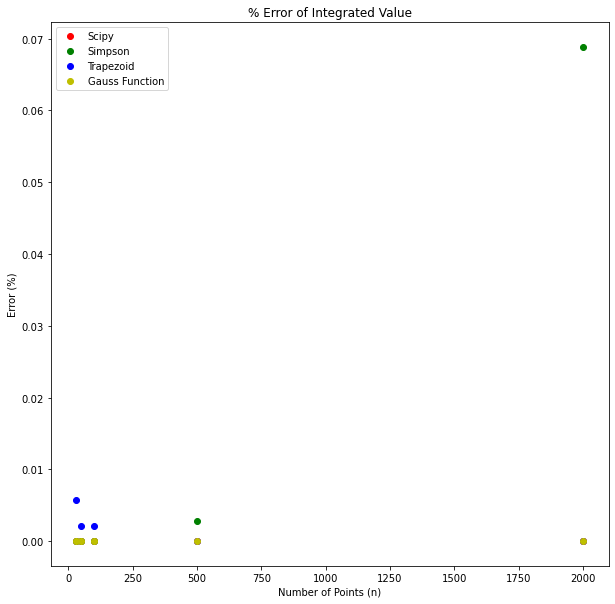

In [256]:
import matplotlib.pyplot as plt
n = np.array([30, 50, 100, 500, 2000])
plt.figure(figsize = (10, 10))
plt.plot(n, error(Scipy, Correct), 'ro', label = 'Scipy')
plt.plot(n, error(Simpson, Correct), 'go', label = 'Simpson')
plt.plot(n, error(Trap, Correct), 'bo', label = 'Trapezoid')
plt.plot(n, error(Gauss, Correct), 'yo', label = 'Gauss Function')
plt.title('% Error of Integrated Value')
plt.xlabel('Number of Points (n)')
plt.ylabel('Error (%)')
plt.legend()
plt.show()



## Analyzing the Error
As the above graph shows, the scipy function and Gauss-Legendre function from lecture 5 have the same percentage error from the correct value of the integral, 1.7227665977411040, regardless of order number. Compared to the Trapezoid and, especially, the Simpson's rule, the relative efficiency and accuracy of the Gauss-Legendre code is consistent with respect to order number; whereas, the Trapezoid and Simpson's rule tend to have a more invariant and higher error percentage as the the order number increases. In particular, the Trapezoid rule greatly benefits from a higher number of orders as its percentage error from n=30 to n=1000 decreases several orders of magnitude. What this error plot stands to show is the efficiency by which the Gauss-Legendre quadrature evaluates integrals, regardless of order number. This also shows one of the drawbacks of the Simpson's rule, where its accuracy depends on the points being evenly spaced.

## Other Applications of Gaussian Quadrature
The efficiency of the Gaussian Quadrature method of solving integrals has applications beyond just mathematics. Largely, there are Physical applications to Gaussian Quadrature, although few and far between compared to other mathematically important equations, such as diffusivity-factor approximation in infared radiation, characterizing heavy-ends of hydrocarbon fluids for modeling wax precipitation, and neural network modelling in Earth networks. It is interesting to see the scope of Gaussian Quadrature go beyond simply the tedium of mathematical operations. 

## References
Some Applications of Gaussian Quadrature and Neural Network Modeling in Earth Flows and Other Slow-Moving Landslides in Cohesive Slope Materials - https://scholarworks.wmich.edu/cgi/viewcontent.cgi?article=4448&context=dissertations

Application of Gaussian quadrature method to characterize heavy ends of hydrocarbon fluids for modeling wax precipitation - https://www.sciencedirect.com/science/article/pii/S0307904X10002167

Gaussian Quadrature and Its Application to Infrared Radiation - https://journals.ametsoc.org/view/journals/atsc/57/5/1520-0469_2000_057_0753_gqaiat_2.0.co_2.xml

Gaussian Quadrature Weights and Abscissae - https://pomax.github.io/bezierinfo/legendre-gauss.html

Legendre Polynomial - https://mathworld.wolfram.com/LegendrePolynomial.html

Gauss–Legendre quadrature - https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature

Gaussian Quadrature - https://www.math.usm.edu/lambers/mat460/fall09/lecture31.pdf

Quadrature Rules - https://link.springer.com/content/pdf/bbm%3A978-1-4612-0101-4%2F1.pdf

Gauss Quadrature and Multi-dimensional Integrals - https://www.sciencedirect.com/topics/engineering/gaussian-quadrature-rule

Gaussian quadrature - https://en.wikipedia.org/wiki/Gaussian_quadrature#

Lecture 5 Integrals - https://github.com/qzhu2017/ComputationalPhysics300/blob/master/Lectures/Lec_05_integral.ipynb